# Importing the Libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [106]:
df = pd.read_csv("players_stats_by_season_full_details.csv")
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,...,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,...,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics


# EDA

In [107]:
# only keep the euroleague information
df = df[df.League  == "Euroleague"]
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
342,Euroleague,2000 - 2001,International,Gregor Fucka,BOL,17,568.2,127,226,12,...,"Aug 7, 1971",7-1,216.0,216.0,98.0,Italy / Slovenia,NaN,NaN,NaN,NaN
343,Euroleague,2000 - 2001,International,Manu Ginobili,BOL,22,654.4,110,247,30,...,"Jul 28, 1977",6-6,198.0,205.0,93.0,Argentina,NaN,2.0,28.0,San Antonio Spurs
344,Euroleague,2000 - 2001,International,Elmer Bennett,CAJ,22,784.3,100,254,22,...,"Feb 13, 1970",6-0,183.0,171.0,78.0,United States,Bellaire High School,2.0,11.0,Atlanta Hawks
345,Euroleague,2000 - 2001,International,Alphonso Ford,PER,12,413.8,116,214,15,...,"Oct 31, 1971",6-1,185.0,190.0,86.0,United States,Amanda Elzy High School,2.0,5.0,Philadelphia Sixers
346,Euroleague,2000 - 2001,International,Sani Becirovic,OLI,15,485.9,94,221,28,...,"May 19, 1981",6-4,193.0,196.0,89.0,Slovenia,NaN,2.0,17.0,Denver Nuggets


In [108]:
df.Season.iloc[1].split("-")[1].split(" ")[1]

'2001'

In [109]:
# season is only equal to the last value
year = []
for i in range(len(df.Season)):
    year.append(df.Season.iloc[i].split("-")[1].split(" ")[1])

In [110]:
df.Season = year
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
342,Euroleague,2001,International,Gregor Fucka,BOL,17,568.2,127,226,12,...,"Aug 7, 1971",7-1,216.0,216.0,98.0,Italy / Slovenia,NaN,NaN,NaN,NaN
343,Euroleague,2001,International,Manu Ginobili,BOL,22,654.4,110,247,30,...,"Jul 28, 1977",6-6,198.0,205.0,93.0,Argentina,NaN,2.0,28.0,San Antonio Spurs
344,Euroleague,2001,International,Elmer Bennett,CAJ,22,784.3,100,254,22,...,"Feb 13, 1970",6-0,183.0,171.0,78.0,United States,Bellaire High School,2.0,11.0,Atlanta Hawks
345,Euroleague,2001,International,Alphonso Ford,PER,12,413.8,116,214,15,...,"Oct 31, 1971",6-1,185.0,190.0,86.0,United States,Amanda Elzy High School,2.0,5.0,Philadelphia Sixers
346,Euroleague,2001,International,Sani Becirovic,OLI,15,485.9,94,221,28,...,"May 19, 1981",6-4,193.0,196.0,89.0,Slovenia,NaN,2.0,17.0,Denver Nuggets


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3322 entries, 342 to 49288
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       3322 non-null   object 
 1   Season       3322 non-null   object 
 2   Stage        3322 non-null   object 
 3   Player       3322 non-null   object 
 4   Team         3322 non-null   object 
 5   GP           3322 non-null   int64  
 6   MIN          3322 non-null   float64
 7   FGM          3322 non-null   int64  
 8   FGA          3322 non-null   int64  
 9   3PM          3322 non-null   int64  
 10  3PA          3322 non-null   int64  
 11  FTM          3322 non-null   int64  
 12  FTA          3322 non-null   int64  
 13  TOV          3322 non-null   int64  
 14  PF           3322 non-null   int64  
 15  ORB          3322 non-null   int64  
 16  DRB          3322 non-null   int64  
 17  REB          3322 non-null   int64  
 18  AST          3322 non-null   int64  
 19  STL

In [112]:
# calculate the field goals success rate
df["field_goal_per"] = df["FGM"] / df["FGA"] * 100
df.drop("FGM", axis = 1, inplace=True)
df.drop("FGA", axis = 1, inplace=True)

# calculate the three points success rate
df["three_points_per"] = df["3PM"] / df["3PA"] * 100
df.drop("3PM", axis = 1, inplace=True)
df.drop("3PA", axis = 1, inplace=True)

# calculate the free throws success rate
df["free_throws_per"] = df["FTM"] / df["FTA"] * 100
df.drop("FTM", axis = 1, inplace=True)
df.drop("FTA", axis = 1, inplace=True)

# drop the full birth date
df.drop("birth_date", axis = 1, inplace=True)

# drop height in feet
df.drop("height", axis = 1, inplace=True)

# drop weight in pounds
df.drop("weight", axis = 1, inplace=True)

In [113]:
#Points per game
df['points_per_game'] = df['PTS'] / df['GP']

#Minutes per game
df['min_per_game'] = df['MIN'] / df['GP']

#Turnover per game
df['turnover_per_game'] = df['TOV'] / df['GP']

#Fauls per game
df['fauls_per_game'] = df['PF'] / df['GP']

In [114]:
df = df.drop(['MIN', 'TOV', 'PF', 'PTS'], axis=1)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3322 entries, 342 to 49288
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   League             3322 non-null   object 
 1   Season             3322 non-null   object 
 2   Stage              3322 non-null   object 
 3   Player             3322 non-null   object 
 4   Team               3322 non-null   object 
 5   GP                 3322 non-null   int64  
 6   ORB                3322 non-null   int64  
 7   DRB                3322 non-null   int64  
 8   REB                3322 non-null   int64  
 9   AST                3322 non-null   int64  
 10  STL                3322 non-null   int64  
 11  BLK                3322 non-null   int64  
 12  birth_year         3321 non-null   float64
 13  birth_month        3321 non-null   object 
 14  height_cm          3322 non-null   float64
 15  weight_kg          3264 non-null   float64
 16  nationality        33

In [116]:
df.describe()

,GP,ORB,DRB,REB,AST,STL,BLK,birth_year,height_cm,weight_kg,draft_round,draft_pick,field_goal_per,three_points_per,free_throws_per,points_per_game,min_per_game,turnover_per_game,fauls_per_game
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3321.000000,3322.000000,3264.000000,871.000000,871.000000,3322.000000,3009.000000,3308.000000,3322.000000,3322.000000,3322.000000,3322.000000
mean,18.924142,18.192354,45.429561,63.621915,32.007225,15.281758,5.323299,1982.094550,199.319687,97.933211,1.702641,17.282434,46.451951,33.817297,74.315333,8.861395,22.513428,1.443590,2.319642
std,7.114474,15.327442,28.263994,40.819227,30.876125,9.548152,7.209448,6.493516,8.476272,12.198575,0.484215,8.482607,8.271128,13.720477,12.573556,3.647750,5.563215,0.661814,0.668303
min,3.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1963.000000,165.000000,69.000000,1.000000,1.000000,16.000000,0.000000,0.000000,0.400000,2.750000,0.000000,0.357143
25%,13.000000,7.000000,24.000000,33.000000,12.000000,8.000000,1.000000,1977.000000,193.000000,88.000000,1.000000,11.000000,40.871152,28.571429,66.666667,6.323333,18.671165,0.958333,1.857143
50%,19.000000,14.000000,39.000000,54.000000,22.000000,13.000000,3.000000,1982.000000,201.000000,98.000000,2.000000,18.000000,45.623560,35.135135,75.694981,8.470175,22.408333,1.352941,2.300000
75%,24.000000,25.000000,60.000000,85.000000,40.000000,20.000000,7.000000,1987.000000,206.000000,107.000000,2.000000,24.000000,51.219512,40.650407,83.333333,11.142857,26.426786,1.846154,2.772727
max,37.000000,117.000000,202.000000,282.000000,286.000000,64.000000,68.000000,2002.000000,229.000000,170.000000,4.000000,30.000000,100.000000,100.000000,100.000000,26.666667,37.150000,4.700000,4.833333


In [117]:
# we have several values for each player on each year. we only care about their latest team since they will join euroleague with them.
df[df.Player =="Shane Larkin"]

,League,Season,Stage,Player,Team,GP,ORB,DRB,REB,AST,...,draft_round,draft_pick,draft_team,field_goal_per,three_points_per,free_throws_per,points_per_game,min_per_game,turnover_per_game,fauls_per_game
33764,Euroleague,2017,International,Shane Larkin,CAJ,33,18,71,89,187,...,1.0,18.0,Atlanta Hawks,40.579710,34.265734,79.687500,13.060606,28.903030,2.787879,2.424242
43224,Euroleague,2019,International,Shane Larkin,EFE,35,12,65,77,110,...,1.0,18.0,Atlanta Hawks,49.819495,44.897959,86.607143,12.542857,21.971429,1.828571,1.571429
49054,Euroleague,2020,International,Shane Larkin,EFE,25,12,66,78,102,...,1.0,18.0,Atlanta Hawks,52.996845,50.867052,90.344828,22.200000,29.944000,2.160000,1.320000


In [118]:
df = df.sort_values('Season', ascending=False).drop_duplicates('Player', keep='first')
df

,League,Season,Stage,Player,Team,GP,ORB,DRB,REB,AST,...,draft_round,draft_pick,draft_team,field_goal_per,three_points_per,free_throws_per,points_per_game,min_per_game,turnover_per_game,fauls_per_game
49288,Euroleague,2020,International,Andrea Cinciarini,MIL,13,1,8,9,8,...,NaN,NaN,NaN,18.181818,16.666667,25.000000,0.461538,6.376923,0.153846,0.846154
49126,Euroleague,2020,International,Arturas Milaknis,ZAL,28,7,34,41,17,...,NaN,NaN,NaN,46.621622,39.473684,83.333333,7.428571,22.071429,0.714286,2.035714
49138,Euroleague,2020,International,George Papagiannis,PAN,27,42,86,128,6,...,1.0,13.0,Phoenix Suns,62.043796,0.000000,66.666667,6.888889,17.544444,1.000000,1.962963
49137,Euroleague,2020,International,Fabien Causeur,RMB,25,9,28,37,37,...,NaN,NaN,NaN,54.814815,47.272727,65.000000,7.480000,16.332000,0.840000,1.280000
49136,Euroleague,2020,International,Quim Colom,VAL,26,5,35,40,109,...,NaN,NaN,NaN,36.904762,31.460674,70.909091,7.346154,18.469231,1.846154,0.730769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,Euroleague,2001,International,Andrea Camata,STV,11,24,53,77,6,...,NaN,NaN,NaN,68.333333,NaN,63.636364,8.090909,20.790909,1.000000,4.000000
455,Euroleague,2001,International,Francisco Elson,FCB,12,30,40,70,7,...,2.0,12.0,Denver Nuggets,61.666667,NaN,45.945946,7.583333,22.550000,1.583333,4.166667
447,Euroleague,2001,International,Dusan Stevic,LUG,10,18,29,47,0,...,NaN,NaN,NaN,45.238095,32.258065,52.380952,9.700000,22.430000,1.900000,3.800000
454,Euroleague,2001,International,Wouter De Wilde,SPI,10,4,14,18,2,...,NaN,NaN,NaN,47.058824,51.162791,46.153846,9.200000,24.510000,1.500000,3.600000


In [119]:
df[df.Player =="Shane Larkin"]

,League,Season,Stage,Player,Team,GP,ORB,DRB,REB,AST,...,draft_round,draft_pick,draft_team,field_goal_per,three_points_per,free_throws_per,points_per_game,min_per_game,turnover_per_game,fauls_per_game
49054,Euroleague,2020,International,Shane Larkin,EFE,25,12,66,78,102,...,1.0,18.0,Atlanta Hawks,52.996845,50.867052,90.344828,22.2,29.944,2.16,1.32


In [120]:
df = df.reset_index()

In [121]:
df = df.drop("index", axis = 1)

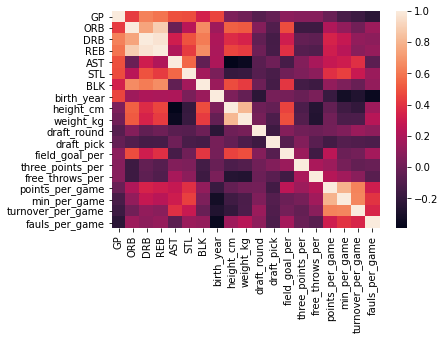

In [122]:
corr = df.corr()
sns.heatmap(corr);

# Data Visualization

In [123]:
df.Team.value_counts()

UNI     63
MAC     56
OLY     54
ZAL     52
MIL     50
        ..
RHEI     3
SS       3
PAOK     2
NIZ      2
DYN      2
Name: Team, Length: 80, dtype: int64

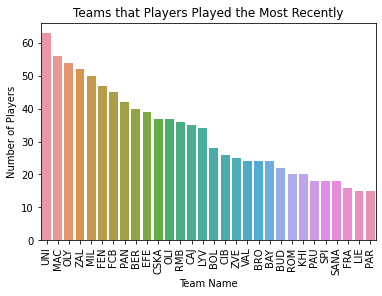

In [124]:
df.Team.value_counts().head(30).index
df.Team.value_counts().head(30).values

sns.barplot(x= df.Team.value_counts().head(30).index, y=df.Team.value_counts().head(30).values)
plt.xticks(rotation=90)
plt.xlabel("Team Name")
plt.ylabel("Number of Players")
plt.title("Teams that Players Played the Most Recently");

In [125]:
top_nationalities = df.nationality.value_counts().head(30)

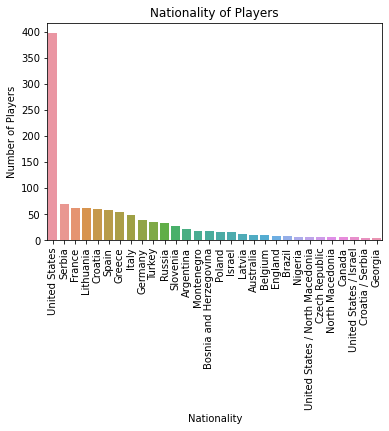

In [126]:
sns.barplot(x = top_nationalities.index, y = top_nationalities.values)
plt.xticks(rotation=90)
plt.xlabel("Nationality")
plt.ylabel("Number of Players")
plt.title("Nationality of Players");

In [127]:
high_school = df["high_school"].value_counts().head(20)

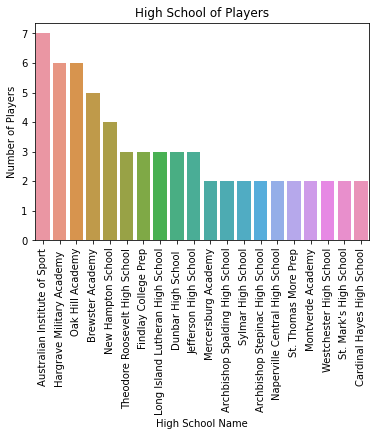

In [128]:
sns.barplot(x = high_school.index, y = high_school.values)
plt.xticks(rotation=90)
plt.xlabel("High School Name")
plt.ylabel("Number of Players")
plt.title("High School of Players");

In [129]:
# I will drop the high school columns since it is not a good predictor
df.drop("high_school", axis = 1, inplace=True)

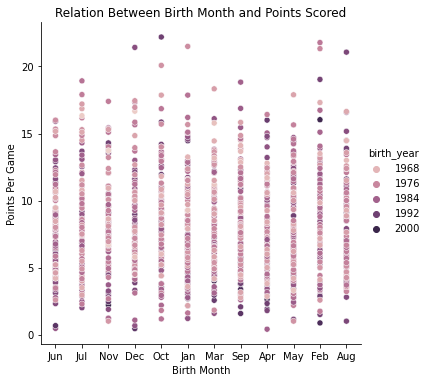

In [130]:
# check if a specific birth month brings more points

sns.relplot(x="birth_month", y="points_per_game", data=df, kind="scatter", hue="birth_year")
plt.xlabel("Birth Month")
plt.ylabel("Points Per Game")
plt.title("Relation Between Birth Month and Points Scored");

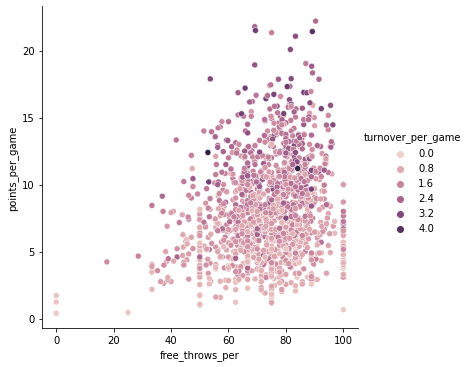

In [131]:
sns.relplot(x="free_throws_per", y="points_per_game", data=df, kind="scatter", hue="turnover_per_game");

In [132]:
df.isna().sum()

League                  0
Season                  0
Stage                   0
Player                  0
Team                    0
GP                      0
ORB                     0
DRB                     0
REB                     0
AST                     0
STL                     0
BLK                     0
birth_year              1
birth_month             1
height_cm               0
weight_kg              47
nationality             0
draft_round          1033
draft_pick           1033
draft_team           1033
field_goal_per          0
three_points_per      132
free_throws_per        11
points_per_game         0
min_per_game            0
turnover_per_game       0
fauls_per_game          0
dtype: int64

In [ ]:
# save this to use it
df.to_csv("players_final.csv")

# Fill the Missing Values

In [133]:
df.head()

,League,Season,Stage,Player,Team,GP,ORB,DRB,REB,AST,...,draft_round,draft_pick,draft_team,field_goal_per,three_points_per,free_throws_per,points_per_game,min_per_game,turnover_per_game,fauls_per_game
0,Euroleague,2020,International,Andrea Cinciarini,MIL,13,1,8,9,8,...,NaN,NaN,NaN,18.181818,16.666667,25.000000,0.461538,6.376923,0.153846,0.846154
1,Euroleague,2020,International,Arturas Milaknis,ZAL,28,7,34,41,17,...,NaN,NaN,NaN,46.621622,39.473684,83.333333,7.428571,22.071429,0.714286,2.035714
2,Euroleague,2020,International,George Papagiannis,PAN,27,42,86,128,6,...,1.0,13.0,Phoenix Suns,62.043796,0.000000,66.666667,6.888889,17.544444,1.000000,1.962963
3,Euroleague,2020,International,Fabien Causeur,RMB,25,9,28,37,37,...,NaN,NaN,NaN,54.814815,47.272727,65.000000,7.480000,16.332000,0.840000,1.280000
4,Euroleague,2020,International,Quim Colom,VAL,26,5,35,40,109,...,NaN,NaN,NaN,36.904762,31.460674,70.909091,7.346154,18.469231,1.846154,0.730769


In [136]:
# all missing except month and year
df["weight_kg"].fillna(df["weight_kg"].mean, inplace=True)
df["draft_team"].fillna("missing", inplace=True)
df["draft_round"].fillna(df["draft_round"].mean(), inplace=True)
df["draft_pick"].fillna(df["draft_pick"].mean(), inplace=True)
df["three_points_per"].fillna(df["three_points_per"].mean(), inplace=True)
df["free_throws_per"].fillna(df["free_throws_per"].mean(), inplace=True)

In [98]:
df[df["birth_month"].isna()]

,League,Season,Stage,Player,Team,GP,ORB,DRB,REB,AST,...,draft_round,draft_pick,draft_team,field_goal_per,three_points_per,free_throws_per,points_per_game,min_per_game,turnover_per_game,fauls_per_game
1294,Euroleague,2001,International,Richard Mandeville,ZAD,10,7,26,33,3,...,1.712418,16.852941,missing,56.0,0.0,75.0,7.1,18.11,1.2,3.1


In [99]:
# will drop this row since it belongs to a player from an older season
df = df.drop(df.iloc[1294].name, axis = 0)
df = df.reset_index()

In [100]:
df.isna().sum().sum()

0

In [101]:
df.head()

,index,League,Season,Stage,Player,Team,GP,ORB,DRB,REB,...,draft_round,draft_pick,draft_team,field_goal_per,three_points_per,free_throws_per,points_per_game,min_per_game,turnover_per_game,fauls_per_game
0,0,Euroleague,2020,International,Andrea Cinciarini,MIL,13,1,8,9,...,1.712418,16.852941,missing,18.181818,16.666667,25.000000,0.461538,6.376923,0.153846,0.846154
1,1,Euroleague,2020,International,Arturas Milaknis,ZAL,28,7,34,41,...,1.712418,16.852941,missing,46.621622,39.473684,83.333333,7.428571,22.071429,0.714286,2.035714
2,2,Euroleague,2020,International,George Papagiannis,PAN,27,42,86,128,...,1.000000,13.000000,Phoenix Suns,62.043796,0.000000,66.666667,6.888889,17.544444,1.000000,1.962963
3,3,Euroleague,2020,International,Fabien Causeur,RMB,25,9,28,37,...,1.712418,16.852941,missing,54.814815,47.272727,65.000000,7.480000,16.332000,0.840000,1.280000
4,4,Euroleague,2020,International,Quim Colom,VAL,26,5,35,40,...,1.712418,16.852941,missing,36.904762,31.460674,70.909091,7.346154,18.469231,1.846154,0.730769


In [102]:
df.drop("League", axis = 1, inplace = True)
df.drop("Stage", axis = 1, inplace = True)

In [103]:
df.drop("index", axis = 1, inplace=True)
df.head()

,Season,Player,Team,GP,ORB,DRB,REB,AST,STL,BLK,...,draft_round,draft_pick,draft_team,field_goal_per,three_points_per,free_throws_per,points_per_game,min_per_game,turnover_per_game,fauls_per_game
0,2020,Andrea Cinciarini,MIL,13,1,8,9,8,3,0,...,1.712418,16.852941,missing,18.181818,16.666667,25.000000,0.461538,6.376923,0.153846,0.846154
1,2020,Arturas Milaknis,ZAL,28,7,34,41,17,24,1,...,1.712418,16.852941,missing,46.621622,39.473684,83.333333,7.428571,22.071429,0.714286,2.035714
2,2020,George Papagiannis,PAN,27,42,86,128,6,10,25,...,1.000000,13.000000,Phoenix Suns,62.043796,0.000000,66.666667,6.888889,17.544444,1.000000,1.962963
3,2020,Fabien Causeur,RMB,25,9,28,37,37,8,1,...,1.712418,16.852941,missing,54.814815,47.272727,65.000000,7.480000,16.332000,0.840000,1.280000
4,2020,Quim Colom,VAL,26,5,35,40,109,17,0,...,1.712418,16.852941,missing,36.904762,31.460674,70.909091,7.346154,18.469231,1.846154,0.730769


# Handle Categorical Data

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1338 non-null   int64  
 1   Season             1338 non-null   object 
 2   Player             1338 non-null   object 
 3   Team               1338 non-null   object 
 4   GP                 1338 non-null   int64  
 5   ORB                1338 non-null   int64  
 6   DRB                1338 non-null   int64  
 7   REB                1338 non-null   int64  
 8   AST                1338 non-null   int64  
 9   STL                1338 non-null   int64  
 10  BLK                1338 non-null   int64  
 11  birth_year         1338 non-null   float64
 12  birth_month        1338 non-null   object 
 13  height_cm          1338 non-null   float64
 14  weight_kg          1338 non-null   object 
 15  nationality        1338 non-null   object 
 16  draft_round        1338 

In [146]:
# weight column to numeric
df['weight_kg'] = pd.to_numeric(df['weight_kg'], errors='coerce')

In [150]:
cat_col = ["Player", "Team", "birth_month", "nationality", "draft_team"]

In [151]:
dummies = pd.get_dummies(df[cat_col])

In [152]:
df = df.drop(cat_col, axis = 1)
df = pd.concat([df, dummies], axis = 1)

In [153]:
df.head()

,index,Season,GP,ORB,DRB,REB,AST,STL,BLK,birth_year,...,draft_team_Phoenix Suns,draft_team_Portland Trail Blazers,draft_team_Sacramento Kings,draft_team_San Antonio Spurs,draft_team_Seattle SuperSonics,draft_team_Toronto Raptors,draft_team_Utah Jazz,draft_team_Vancouver Grizzlies,draft_team_Washington Wizards,draft_team_missing
0,0,2020,13,1,8,9,8,3,0,1986.0,...,0,0,0,0,0,0,0,0,0,1
1,1,2020,28,7,34,41,17,24,1,1986.0,...,0,0,0,0,0,0,0,0,0,1
2,2,2020,27,42,86,128,6,10,25,1997.0,...,1,0,0,0,0,0,0,0,0,0
3,3,2020,25,9,28,37,37,8,1,1987.0,...,0,0,0,0,0,0,0,0,0,1
4,4,2020,26,5,35,40,109,17,0,1988.0,...,0,0,0,0,0,0,0,0,0,1


In [154]:
df = df.drop("index", axis = 1)

In [157]:
covMat = np.array(df, dtype=float)
np.all(np.isfinite(covMat))

False

In [158]:
np.any(np.isnan(covMat))

True

In [170]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [162]:
df = clean_dataset(df)

# Split the Data

In [186]:
# can we predict points per game
X = df.drop("points_per_game", axis = 1)
y = df["points_per_game"]

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=50)

# Modeling

In [182]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [173]:
# random forest regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.758646164469859

In [174]:
# lasso
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.757131432185598

In [189]:
# SVR
model = SVR()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.024201805536880783

In [188]:
# linear regression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7288426538847737